# Mines vs rocks Classification

### Introduction

This project centers around the Sonar Mines vs Rocks dataset, which presents the challenge of distinguishing between mine and rock objects based on sonar colected data. Each data row consists of a collection of 60 numerical values ranging from 0.0 to 1.0. These values correspond to the energy levels within specific frequency bands, integrated over a defined time period. The labels assigned to each data point indicate whether the object is a rock (denoted as 'R') or a mine (denoted as 'M').

The project's core aim is to construct a machine learning model capable of discerning between rocks and mines based on the responses from these 60 distinct sonar frequencies.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
sonar = pd.read_excel('sonar.xlsx', sheet_name=0) 
print("\nDimensões: {0}".format(sonar.shape))


Dimensões: (208, 61)


We can see this  dataset contains 60 attributes and a label column classifying rocks as 'R' and mines as 'M'.

In [79]:
sonar.head()

,Atributo_1,Atributo_2,Atributo_3,Atributo_4,Atributo_5,Atributo_6,Atributo_7,Atributo_8,Atributo_9,Atributo_10,...,Atributo_52,Atributo_53,Atributo_54,Atributo_55,Atributo_56,Atributo_57,Atributo_58,Atributo_59,Atributo_60,Classe
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rocha
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rocha
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rocha
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rocha
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rocha


The dataset does not contain null values.

In [80]:
sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Atributo_1   208 non-null    float64
 1   Atributo_2   208 non-null    float64
 2   Atributo_3   208 non-null    float64
 3   Atributo_4   208 non-null    float64
 4   Atributo_5   208 non-null    float64
 5   Atributo_6   208 non-null    float64
 6   Atributo_7   208 non-null    float64
 7   Atributo_8   208 non-null    float64
 8   Atributo_9   208 non-null    float64
 9   Atributo_10  208 non-null    float64
 10  Atributo_11  208 non-null    float64
 11  Atributo_12  208 non-null    float64
 12  Atributo_13  208 non-null    float64
 13  Atributo_14  208 non-null    float64
 14  Atributo_15  208 non-null    float64
 15  Atributo_16  208 non-null    float64
 16  Atributo_17  208 non-null    float64
 17  Atributo_18  208 non-null    float64
 18  Atributo_19  208 non-null    float64
 19  Atributo

In [81]:
sonar.describe().T

,count,mean,std,min,25%,50%,75%,max
Atributo_1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
Atributo_2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
Atributo_3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
Atributo_4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
Atributo_5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
Atributo_6,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
Atributo_7,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
Atributo_8,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
Atributo_9,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
Atributo_10,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


<AxesSubplot:>

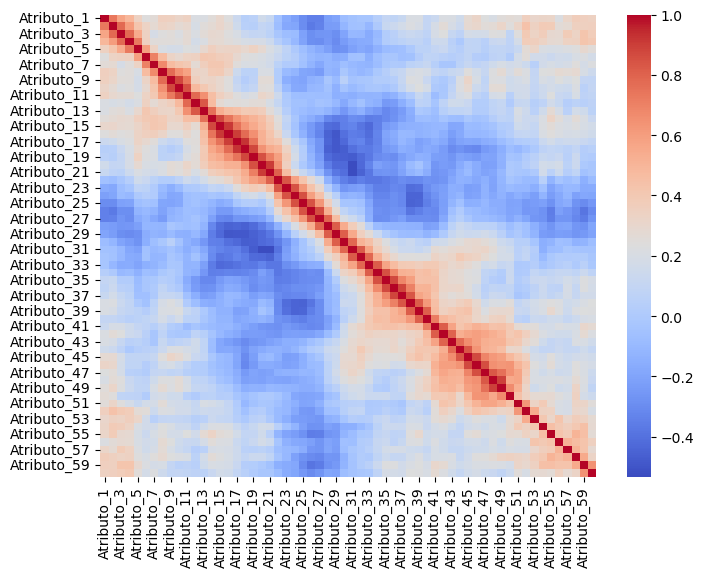

In [82]:
plt.figure(figsize=(8,6))
sns.heatmap(data=sonar.corr(),cmap='coolwarm')

## Machine learning

In [83]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_absolute_error

X = sonar.iloc[:,0:(sonar.shape[1] - 1)]
y = sonar.Classe
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Models

First we will evaluate the performance of different models.

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier,GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('Ada', AdaBoostClassifier(DecisionTreeClassifier())))
models.append(('SVM', SVC()))
models.append(('HXG', HistGradientBoostingClassifier()))
models.append(('XG', GradientBoostingClassifier()))
models.append(('MLP', MLPClassifier(max_iter=1000)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))

num_folds=10
results = []
names = []
kfold = KFold(n_splits=num_folds,random_state=0,shuffle=True)

for name, model in models:
    
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "%s accuracy:  %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF accuracy:  0.743600 (0.108124)
CART accuracy:  0.554188 (0.133878)
LR accuracy:  0.690022 (0.122502)
Ada accuracy:  0.582244 (0.109850)
SVM accuracy:  0.678517 (0.140809)
HXG accuracy:  0.869798 (0.102607)
XG accuracy:  0.750260 (0.143754)
MLP accuracy:  0.803878 (0.078857)
KNN accuracy:  0.746656 (0.088744)


From the previous results I selected the KNN, MLP and Historical gradient boosting to tune.

## KNN model

In [85]:
KNN = KNeighborsClassifier()
KNN = KNN.fit(X_train,y_train)

In [86]:
y_pred = KNN.predict(X_test)

In [87]:
mean_absolute_error(y_test, y_pred)

0.14285714285714285

In [88]:
accuracy_score(y_test, y_pred)

0.8571428571428571

## Scaling the data

Som methods based in distance like KNN can have a great boost in the performance by scaling the data.

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
y_pred = KNN.predict(scaled_X_test)


In [90]:
mean_absolute_error(y_test, y_pred)

0.19047619047619047

In [91]:
accuracy_score(y_test, y_pred)

0.8095238095238095

## KNN Grid Search
To find the better hyperparameters for the KNN model, a gridsearch is performed.

In [92]:
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
grid_model = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param_grid,scoring = 'recall',cv=kfold, verbose=1)

In [95]:
grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [96]:
grid_model.best_estimator_

KNeighborsClassifier(n_neighbors=1, p=1)

In [97]:
pd.DataFrame(grid_model.cv_results_).sort_values('mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,param_weights,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
78,0.002400,0.000490,0.003600,0.000490,ball_tree,10,2,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 10, ...",0.7,...,0.5,0.333333,0.571429,0.666667,0.636364,0.333333,0.3,0.451335,0.174071,157
118,0.002700,0.000459,0.003600,0.000490,kd_tree,10,2,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 10, 'p...",0.7,...,0.5,0.333333,0.571429,0.666667,0.636364,0.333333,0.3,0.451335,0.174071,157
38,0.002500,0.000500,0.003900,0.000700,auto,10,2,uniform,"{'algorithm': 'auto', 'n_neighbors': 10, 'p': ...",0.7,...,0.5,0.333333,0.571429,0.666667,0.636364,0.333333,0.3,0.451335,0.174071,157
158,0.001900,0.000300,0.003700,0.000458,brute,10,2,uniform,"{'algorithm': 'brute', 'n_neighbors': 10, 'p':...",0.7,...,0.5,0.333333,0.571429,0.666667,0.636364,0.333333,0.3,0.451335,0.174071,157
110,0.002600,0.000489,0.003500,0.000500,kd_tree,8,2,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 8, 'p'...",0.6,...,0.4,0.444444,0.571429,0.555556,0.818182,0.666667,0.3,0.493961,0.170354,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.002500,0.000501,0.002900,0.000300,kd_tree,2,1,distance,"{'algorithm': 'kd_tree', 'n_neighbors': 2, 'p'...",0.9,...,0.7,0.888889,0.714286,0.777778,0.727273,0.666667,0.9,0.791378,0.088582,1
120,0.001800,0.000400,0.003200,0.000400,brute,1,1,uniform,"{'algorithm': 'brute', 'n_neighbors': 1, 'p': ...",0.9,...,0.7,0.888889,0.714286,0.777778,0.727273,0.666667,0.9,0.791378,0.088582,1
121,0.001899,0.000539,0.002701,0.000459,brute,1,1,distance,"{'algorithm': 'brute', 'n_neighbors': 1, 'p': ...",0.9,...,0.7,0.888889,0.714286,0.777778,0.727273,0.666667,0.9,0.791378,0.088582,1
80,0.002600,0.000490,0.003399,0.000490,kd_tree,1,1,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 1, 'p'...",0.9,...,0.7,0.888889,0.714286,0.777778,0.727273,0.666667,0.9,0.791378,0.088582,1


In [98]:
y_pred = grid_model.predict(X_test)

In [99]:
accuracy_score(y_test, y_pred)

0.8095238095238095

In [100]:
print(classification_report(y_test, y_pred, target_names=["Mine", "Rock"]))
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mine", "Rock"], columns=["Mine (prev)", "Rock (prev)"])
print(cnf_table)

              precision    recall  f1-score   support

        Mine       0.85      0.85      0.85        13
        Rock       0.75      0.75      0.75         8

    accuracy                           0.81        21
   macro avg       0.80      0.80      0.80        21
weighted avg       0.81      0.81      0.81        21

      Mine (prev)  Rock (prev)
Mine           11            2
Rock            2            6


The confusion matrix shows that we are misslabeling 2 mines as rocks with this model.

## Historical Gradient boost model

In [101]:
from sklearn.ensemble import HistGradientBoostingClassifier

HXG = HistGradientBoostingClassifier()
y_pred = HXG.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred, target_names=["Mine", "Rock"]))
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mine", "Rock"], columns=["Mine (prev)", "Rock (prev)"])
print(cnf_table)

              precision    recall  f1-score   support

        Mine       1.00      0.92      0.96        13
        Rock       0.89      1.00      0.94         8

    accuracy                           0.95        21
   macro avg       0.94      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21

      Mine (prev)  Rock (prev)
Mine           12            1
Rock            0            8


## Historical Gradient boost gridsearch

In [102]:
param_grid = {'max_leaf_nodes':[None,2,10,31,60,100] ,'min_samples_leaf':[1,5,10,20,30,40,50,60]}

In [103]:
Hgb_grid_model = GridSearchCV(estimator=HXG,param_grid=param_grid,cv=kfold,verbose=1)

In [104]:
Hgb_grid_model.fit(scaled_X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=HistGradientBoostingClassifier(),
             param_grid={'max_leaf_nodes': [None, 2, 10, 31, 60, 100],
                         'min_samples_leaf': [1, 5, 10, 20, 30, 40, 50, 60]},
             verbose=1)

In [105]:
Hgb_grid_model.best_estimator_

HistGradientBoostingClassifier(max_leaf_nodes=None)

In [106]:
ypred = Hgb_grid_model.predict(scaled_X_test)

In [107]:
accuracy_score(y_test, y_pred)

0.9523809523809523

In [108]:
print(classification_report(y_test, y_pred, target_names=["Mine", "Rock"]))
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mine", "Rock"], columns=["Mine (prev)", "Rock (prev)"])
print(cnf_table)

              precision    recall  f1-score   support

        Mine       1.00      0.92      0.96        13
        Rock       0.89      1.00      0.94         8

    accuracy                           0.95        21
   macro avg       0.94      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21

      Mine (prev)  Rock (prev)
Mine           12            1
Rock            0            8


In [109]:
print(cnf_matrix)

[[12  1]
 [ 0  8]]


## Neural network model

In [120]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=5000)
mlp.fit(scaled_X_train, y_train)
y_pred = mlp.predict(scaled_X_test)


print(classification_report(y_test, y_pred, target_names=["Mine", "Rock"]))
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mine", "Rock"], columns=["Mine (prev)", "Rock (prev)"])
print(cnf_table)

              precision    recall  f1-score   support

        Mine       1.00      0.92      0.96        13
        Rock       0.89      1.00      0.94         8

    accuracy                           0.95        21
   macro avg       0.94      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21

      Mine (prev)  Rock (prev)
Mine           12            1
Rock            0            8


Initially the neural network shows the same performance as the KNN, misslabeling 2 mines as rocks.

## Neural network gridsearch

The search for better parameters in neural networks can be intense and may take some time.

In [111]:
param_grid = {'hidden_layer_sizes':[10,200,230,250],'activation':['relu', 'logistic','tanh'],'solver':['lbfgs', 'sgd', 'adam']}
 

In [112]:
grid_model = GridSearchCV(estimator=mlp,param_grid=param_grid,scoring = 'recall',cv=kfold, verbose=1)

In [113]:
grid_model.fit(scaled_X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=MLPClassifier(max_iter=5000),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [10, 200, 230, 250],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='recall', verbose=1)

In [114]:
grid_model.best_estimator_

MLPClassifier(hidden_layer_sizes=230, max_iter=5000, solver='lbfgs')

In [115]:
pd.DataFrame(grid_model.cv_results_).sort_values('mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
21,0.136200,0.025628,0.001400,4.899423e-04,logistic,250,lbfgs,"{'activation': 'logistic', 'hidden_layer_sizes...",0.8,0.888889,...,0.6,0.666667,0.571429,0.777778,0.636364,0.500000,0.6,0.691613,0.127805,36
15,0.115900,0.032430,0.001199,3.995782e-04,logistic,200,lbfgs,"{'activation': 'logistic', 'hidden_layer_sizes...",0.8,0.888889,...,0.6,0.666667,0.571429,0.777778,0.727273,0.500000,0.7,0.698203,0.110717,35
18,0.124700,0.020474,0.001300,4.582768e-04,logistic,230,lbfgs,"{'activation': 'logistic', 'hidden_layer_sizes...",0.8,0.888889,...,0.6,0.666667,0.714286,0.888889,0.636364,0.500000,0.7,0.714509,0.117097,34
1,0.902400,0.117311,0.001200,4.008080e-04,relu,10,sgd,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.8,0.888889,...,0.6,0.777778,0.714286,0.666667,0.636364,0.666667,0.8,0.730065,0.084655,33
12,0.015700,0.002759,0.001100,3.000430e-04,logistic,10,lbfgs,"{'activation': 'logistic', 'hidden_layer_sizes...",0.7,0.777778,...,0.7,0.777778,0.714286,0.777778,0.818182,0.500000,0.8,0.731580,0.086514,32
34,2.520001,0.214998,0.001199,3.999122e-04,tanh,250,sgd,"{'activation': 'tanh', 'hidden_layer_sizes': 2...",0.8,1.000000,...,0.7,0.777778,0.571429,0.888889,0.636364,0.500000,0.6,0.734946,0.151895,31
13,0.979500,0.051348,0.001400,4.906321e-04,logistic,10,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.8,1.000000,...,0.6,0.666667,0.714286,0.888889,0.545455,0.500000,0.8,0.739030,0.153711,30
16,2.167100,0.182800,0.001200,4.000911e-04,logistic,200,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.9,1.000000,...,0.6,0.666667,0.571429,0.777778,0.636364,0.666667,0.7,0.739390,0.135632,29
31,2.426607,0.202117,0.001500,4.999420e-04,tanh,230,sgd,"{'activation': 'tanh', 'hidden_layer_sizes': 2...",0.8,1.000000,...,0.7,0.777778,0.714286,0.888889,0.636364,0.666667,0.6,0.753398,0.114490,28
26,0.490601,0.054909,0.001399,4.897752e-04,tanh,10,adam,"{'activation': 'tanh', 'hidden_layer_sizes': 1...",0.9,0.888889,...,0.7,0.666667,0.714286,0.888889,0.727273,0.500000,0.7,0.756100,0.123519,27


In [116]:
y_pred = grid_model.predict(scaled_X_test)

In [117]:
accuracy_score(y_test, y_pred)

1.0

In [118]:
print(classification_report(y_test, y_pred, target_names=["Mine", "Rock"]))
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mine", "Rock"], columns=["Mine (prev)", "Rock (prev)"])
print(cnf_table)

              precision    recall  f1-score   support

        Mine       1.00      1.00      1.00        13
        Rock       1.00      1.00      1.00         8

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

      Mine (prev)  Rock (prev)
Mine           13            0
Rock            0            8


## Conclusion

The MLP model was capable of classifying the mines correctly and performed better than the other models.